<a href="https://colab.research.google.com/github/zxxoxnee/Machine-Learning/blob/master/Linear_Regression%EC%9C%BC%EB%A1%9C_%ED%82%A4_%EB%AA%B8%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #학습 데이터와 테스트 데이터로 나눌 것
from sklearn.metrics import mean_squared_error

예측 모델 세팅 

input data: 사람의 키 (x축)

target data: 사람의 몸무게 (y축)

사용 알고리즘(Estimator): LinearRegression 

데이터 자체가 선형 경향성을 띄고 있음. 

In [2]:
# read weight-height dataset
url = "https://raw.githubusercontent.com/solaris33/data-science-for-all/main/lecture_4/weight-height.csv"
weight_height_df = pd.read_csv(url)

In [3]:
weight_height_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# inch -> cm, lb -> kg
weight_height_df["Height"] = weight_height_df["Height"].apply(lambda x: x * 2.54) #자주 사용될 수 있는 패턴이라 람다식 외우는 것이 좋음
weight_height_df["Weight"] = weight_height_df["Weight"].apply(lambda x: x * 0.4563)

In [5]:
weight_height_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [6]:
weight_height_df.shape #만명에 대한 컬럼 3개

(10000, 3)

In [7]:
weight_height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
weight_height_df.describe() #평균 키와 몸무게를 찍어보는 것임. 

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


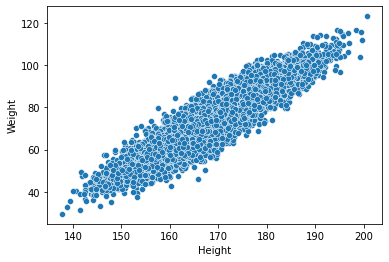

In [9]:
X = weight_height_df["Height"] # 입력데이터
y = weight_height_df["Weight"] # 정답데이터
sns.scatterplot(x = X, y = y)
plt.show()

In [10]:
# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()



In [12]:
# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분을 유의!
lr.fit(X_train.values.reshape(-1,1), y_train)

#Linear Regression 데이터는 2개이상일 때가 좋은데, 예제라서 적으므로, reshape을 통해 dummy 데이터를 넣어줌으로써 2개 이상인 것처럼 표기 

LinearRegression()

In [13]:
# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lr.predict(X_test.values.reshape(-1,1))

In [14]:
y_pred

array([84.26034689, 65.57266709, 89.53554204, ..., 69.0750295 ,
       52.57057991, 76.27696186])

In [15]:
y_test

1089    78.178449
9032    58.914637
3489    86.949902
4328    76.971416
3391    89.498469
          ...    
4038    71.308192
5468    60.950390
8830    66.466475
8831    57.241057
2420    81.343024
Name: Weight, Length: 2000, dtype: float64

In [16]:
# MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 32.97068122639176
RMSE : 5.742010207792369


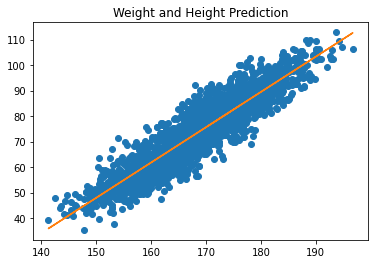

In [17]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, lr.predict(X_test.values.reshape(-1,1)))
plt.title('Weight and Height Prediction')
plt.show()